<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/Twitter_Sentiment_Analysis_on_COVID_19_Pandemic_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Twitter Sentiment Analysis on COVID-19 Pandemic in Malaysia

In [ ]:
# Using malaya library - https://malaya.readthedocs.io/
# Malaya is a Natural-Language-Toolkit library for Bahasa Malaysia, powered by Deep Learning Tensorflow.
%pip install malaya

In [ ]:
import malaya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
# Available Transformer models
malaya.sentiment.available_transformer()

{'albert': ['48.6 MB', 'accuracy: 0.992'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.991'],
 'bert': ['425.6 MB', 'accuracy: 0.993'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.985'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.987'],
 'xlnet': ['446.5 MB', 'accuracy: 0.993']}

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Twitter data was obtained by using GetOldTweets3 for month of Feb till Jun 2020 (using option --near "Kuala Lumpur, Malaysia")
file_path_feb = "/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-feb-2020-cleaned.csv"
file_path_mac = "/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-mac-2020-cleaned.csv"
file_path_apr = "/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-apr-2020-cleaned.csv"
file_path_may = "/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-may-2020-cleaned.csv"
file_path_jun = "/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-jun-2020-cleaned.csv"

In [ ]:
corpus_feb = pd.read_csv(file_path_feb, quotechar='"')
corpus_list_feb = corpus_feb["text"].tolist()
corpus_mac = pd.read_csv(file_path_mac, quotechar='"')
corpus_list_mac = corpus_mac["text"].tolist() 
corpus_apr = pd.read_csv(file_path_apr, quotechar='"')
corpus_list_apr = corpus_apr["text"].tolist() 
corpus_may = pd.read_csv(file_path_may, quotechar='"')
corpus_list_may = corpus_may["text"].tolist() 
corpus_jun = pd.read_csv(file_path_jun, quotechar='"')
corpus_list_jun = corpus_jun["text"].tolist() 

In [ ]:
# Using stacking models
# BERT-base-bahasa, Multinomial & XLNET-base-bahasa
bert = malaya.sentiment.transformer('bert')
multinomial = malaya.sentiment.multinomial()
xlnet = malaya.sentiment.transformer('xlnet')

In [ ]:
def cls_corpus(corpus_list, month):

  data = []
  for i in corpus_list: 
    corpus_result = malaya.stack.predict_stack([bert, multinomial, xlnet], [i])
    for j in corpus_result:
      corpus_result = j.values()
      data.append([corpus_result, i])

  df = pd.DataFrame(data)
  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Positive', 'Neutral']
  df2['Classification'] = df2[['Negative','Positive','Neutral']].idxmax(axis=1)
  df2['Text'] = df[1]

  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  #sns.barplot(class_count.index, class_count.values, alpha=0.8)
  ax = class_count.plot.bar(color=['red', 'yellow', 'green'], figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.title("Twitter Sentiment Analysis on COVID-19 Pandemic in Malaysia ({} 2020)".format(month), fontweight='bold', fontsize=15)
  plt.ylabel('Number of Sentiment', fontweight='bold', fontsize=15)
  plt.xlabel('Classification', fontweight='bold', fontsize=15)
  plt.grid(True)
  
  i = 0
  label = np.round(class_count.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.01), fontweight='bold', fontsize=15)
      i = i+1

  pd.options.display.max_columns = None
  pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Count of Classification: ")
  print(class_count)
  print("")
  print("Total Number of Tweets for {} 2020: ".format(month), df2['Classification'].count())
  print("")
  plt.show()

  df2.to_csv("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-{}-2020_result.csv".format(month))

     Negative  Positive   Neutral Classification                                                                                                              Text
0    0.000011  0.957890  0.001045  Positive       Tourism body sees silver lining after covid19 hits industry                                                     
1    0.005408  0.077216  0.047666  Positive       will continue to be investor-friendly despite several issues plaguing the country                               
2    0.821945  0.000007  0.000649  Negative       Airlines banyak gila buat sale. Tapi apakan daya                                                                
3    0.000171  0.811838  0.016898  Positive       Whatever state is happening at this moment                                                                      
4    0.029632  0.042894  0.271827  Neutral        Several factors affect economy such as political tumult                                                         
..        ...       ..

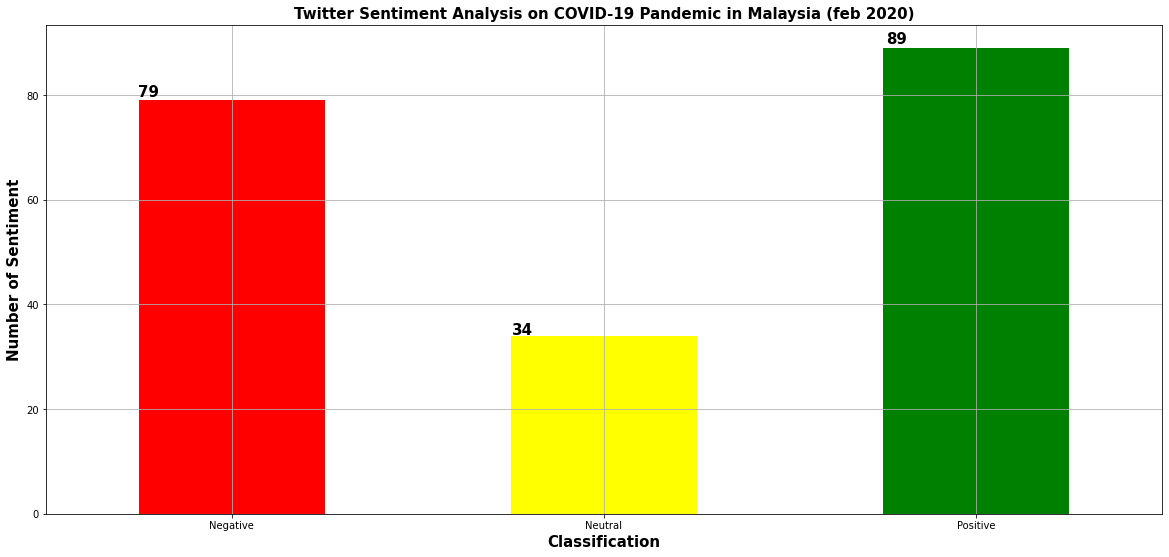

In [ ]:
cls_corpus(corpus_list_feb, "feb")

      Negative  Positive   Neutral Classification                                                                                                                                                                                                                                                                               Text
0     0.000297  0.874581  0.029427  Positive       If you're feeling hungry & wanna do some food take-aways during this #covid19 season, order them from your local 'gerai's. Avoid all unhealthy #FastFood #supportsmallbusiness                                                                                                   
1     0.890692  0.000007  0.000660  Negative       Their negara bebas covid19??? Bukan haritu ada news saying that China is still on quarantine ke sebenarnya? Dia buat buat macam dah reda sbb dia nak tipu satu dunia...? And bukan haritu ada news ke yang...jual haiwan eksotik dah dilarang dekat sana?                        
2     0.000187  0.929276 

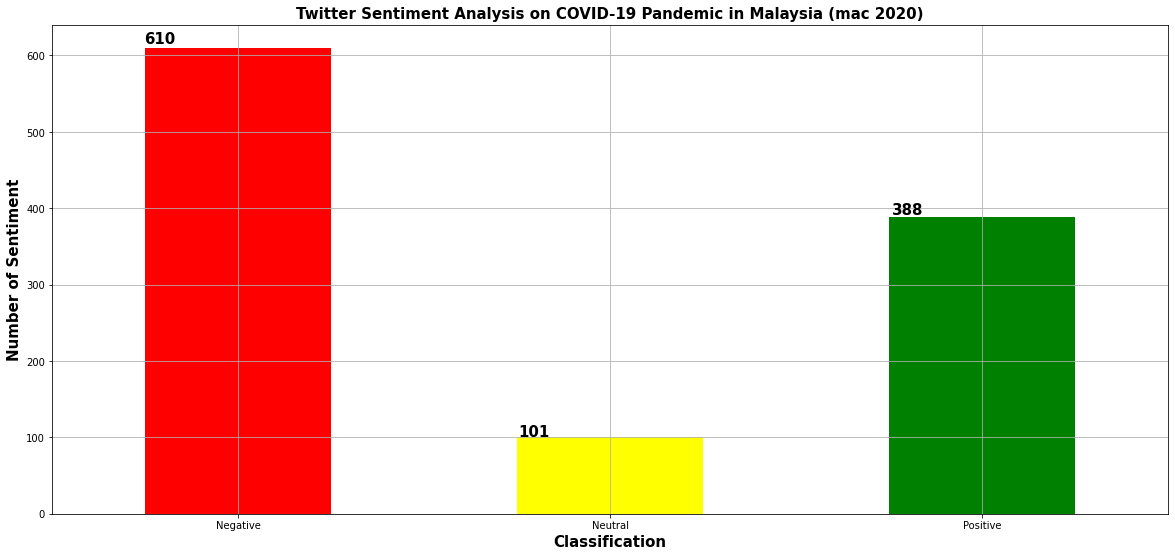

In [ ]:
cls_corpus(corpus_list_mac, "mac")

      Negative  Positive   Neutral Classification                                                                                                                                                                                                                                                                 Text
0     0.981467  0.000003  0.000297  Negative       Kesian Menteri BD baru pegang jawatan kena tangani musibah covid19                                                                                                                                                                                                 
1     0.000218  0.148268  0.003649  Positive       Alhamdulillah Pasar Borong hari ni padat. ramai datang berdua. insyaAllah kita dapat selesaikan covid ni. Hidup kerajaan!!                                                                                                                                         
2     0.156196  0.000578  0.010510  Negative       If covid can spr

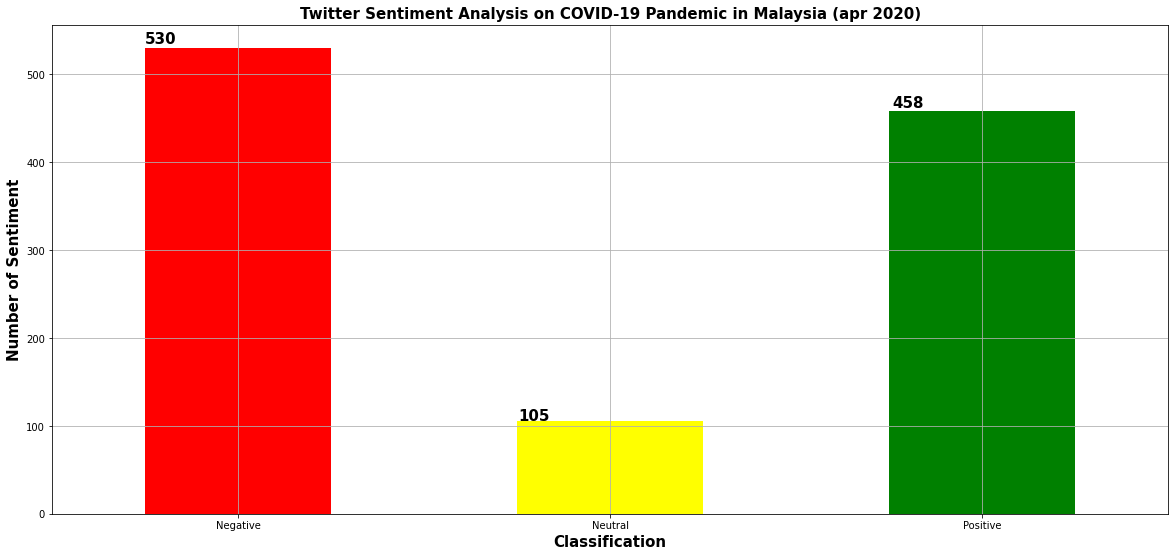

In [ ]:
cls_corpus(corpus_list_apr, "apr")

      Negative  Positive   Neutral Classification                                                                                                                                                                                                                                                                                    Text
0     0.957088  0.000035  0.003424  Negative       Imagine kalau ayah tu pembawa covid, berapa ramai yang akan terjangkit? Ke tak?                                                                                                                                                                                                       
1     0.847043  0.000008  0.000786  Negative       Nak buek camno jang, virus covid19 lagi bahayo. Harap semua bakal pengantin kekal tabah and jangan ketaq lutur ehh.                                                                                                                                                                   
2     0.00

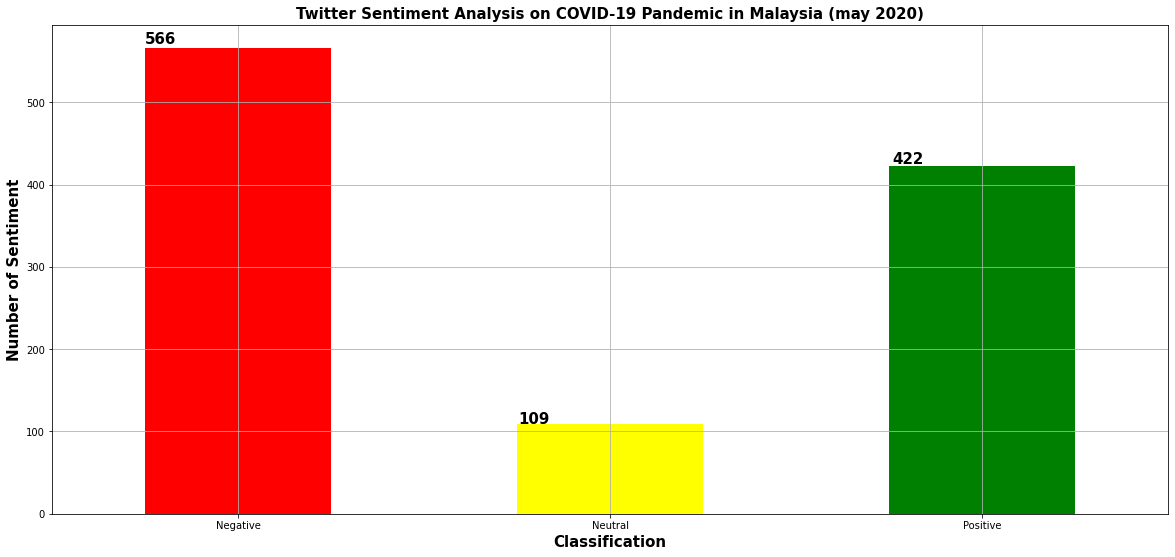

In [ ]:
cls_corpus(corpus_list_may, "may")

      Negative      Positive   Neutral Classification                                                                                                                                                                                                                                                                                  Text
0     0.000887  8.135853e-01  0.087851  Positive       JOIN OUR CONVERSATION IN WASTE MANAGEMENT SOLUTIONS POST covid19 ORGANISED BY MiGHT Webex and via Youtube Live 30 June 2020 10am @mightmalaysia @swcorp_my @alamfloramynew                                                                                                          
1     0.997460  3.919568e-07  0.000000  Negative       Kesian para pelajar di Mesir nak balik sebab takut wabak covid19 yang masih merebak bahaya kat sana. Tolong share dengan para jutawan dan dermawan dan harap2 ada yang menyumbang. Kerajaan @MalaysiaMFA mohon bantuan khidmat nasihat. Kami juga cadang nak mengadap. Pls rt.      
2   

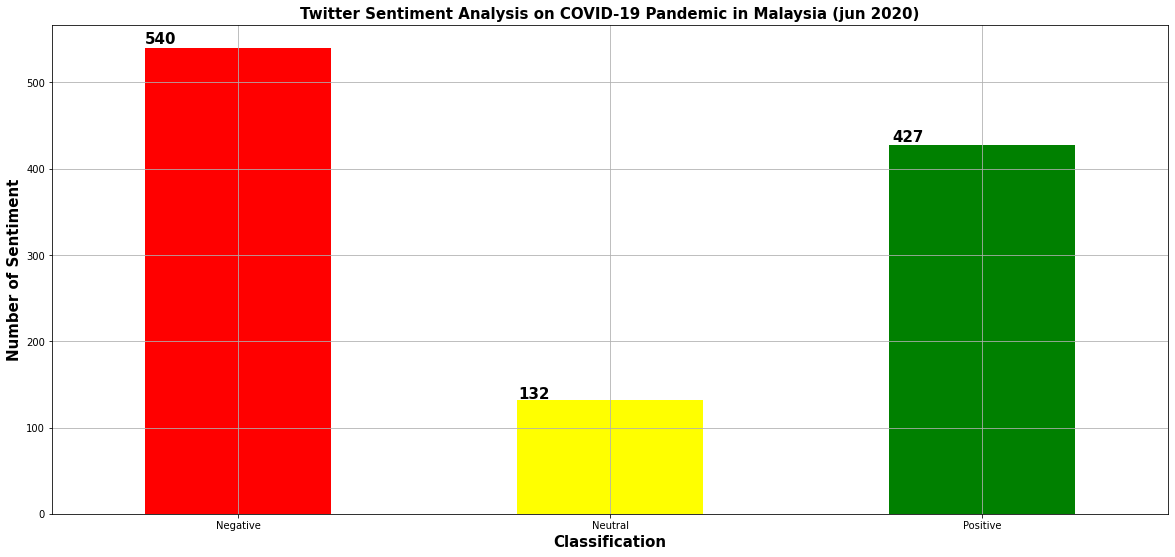

In [ ]:
cls_corpus(corpus_list_jun, "jun")

In [ ]:
# corpus_list_feb_result = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_feb)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-feb-2020_result.txt", "w") as output:
#     output.write(str(corpus_list_feb_result))

In [ ]:
# # Lists too long, have to split into 2 lists
# def split_list(a_list):
#     half = len(a_list)//2
#     return a_list[:half], a_list[half:]

In [ ]:
# corpus_list_mac_part1, corpus_list_mac_part2 = split_list(corpus_list_mac)

# corpus_list_mac_result_part1 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_mac_part1)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-mac-2020_result_part1.txt", "w") as output:
#     output.write(str(corpus_list_mac_result_part1))

# corpus_list_mac_result_part2 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_mac_part2)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-mac-2020_result_part2.txt", "w") as output:
#     output.write(str(corpus_list_mac_result_part2))

In [ ]:
# corpus_list_apr_part1, corpus_list_apr_part2 = split_list(corpus_list_apr)

# corpus_list_apr_result_part1 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_apr_part1)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-apr-2020_result_part1.txt", "w") as output:
#     output.write(str(corpus_list_apr_result_part1))

# corpus_list_apr_result_part2 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_apr_part2)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-apr-2020_result_part2.txt", "w") as output:
#     output.write(str(corpus_list_apr_result_part2))

In [ ]:
# corpus_list_may_part1, corpus_list_may_part2 = split_list(corpus_list_may)

# corpus_list_may_result_part1 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_may_part1)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-may-2020_result_part1.txt", "w") as output:
#     output.write(str(corpus_list_may_result_part1))

# corpus_list_may_result_part2 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_may_part2)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-may-2020_result_part2.txt", "w") as output:
#     output.write(str(corpus_list_may_result_part2))

In [ ]:
# corpus_list_jun_part1, corpus_list_jun_part2 = split_list(corpus_list_jun)

# corpus_list_jun_result_part1 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_jun_part1)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-jun-2020_result_part1.txt", "w") as output:
#     output.write(str(corpus_list_jun_result_part1))

# corpus_list_jun_result_part2 = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_jun_part2)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-jun-2020_result_part2.txt", "w") as output:
#     output.write(str(corpus_list_jun_result_part2))

In [ ]:
# corpus_list_apr_result = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_apr)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-apr-2020_result.txt", "w") as output:
#     output.write(str(corpus_list_apr_result))

In [ ]:
# corpus_list_may_result = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_may)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-may-2020_result.txt", "w") as output:
#     output.write(str(corpus_list_may_result))

In [ ]:
# corpus_list_jun_result = malaya.stack.predict_stack([bert, multinomial, xlnet], corpus_list_jun)
# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-covid-jun-2020_result.txt", "w") as output:
#     output.write(str(corpus_list_jun_result))

In [ ]:
# import csv

# with open("/content/drive/My Drive/Twitter Covid Coronavirus/tweet_malaysia-coronavirus-02-2020_result.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     writer.writerows(corpus_list_feb_result)